In [49]:
import pickle
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [66]:
with open('dataTrain.h5', 'rb') as f:
  data = pickle.load(f)

In [68]:
PerT=data[0]

In [10]:
cd "C:\Users\de\Desktop\Fresher Data Scientist"

C:\Users\de\Desktop\Fresher Data Scientist


In [35]:
NumTran=cus1Fre.values

In [15]:
data = pd.read_csv('1MG_FreshData.csv')
data1=data[0:52092]
cusID1 = data1["csn"]
tranDate1=data1["date"]
cus1Fre=cusID1.value_counts()	
Customer1=np.array(cus1Fre.index)

In [81]:
dataTrain={'Csn':Customer1, 'AverArti': PerT[:,0],
                'AverPrice': PerT[:,1],
                'NumTran':NumTran,'NumTranNext':data[2]}

In [82]:
dataTrain

{'Csn': array(['ZGZobGdp', 'Y2NibmVq', 'Z2hi', ..., 'YmVna2RlYA==',
        'Y2VhcWNjYA==', 'Ymloa2VmYQ=='], dtype=object),
 'AverArti': array([ 7.83018868,  5.88461538,  8.77083333, ...,  3.        ,
        20.        ,  8.        ]),
 'AverPrice': array([ 523581.33509434,  368042.59730769,  552052.72083333, ...,
          39300.        , 1323998.17      ,  444500.        ]),
 'NumTran': array([53, 52, 48, ...,  1,  1,  1], dtype=int64),
 'NumTranNext': array([30, 26, 25, ...,  0,  0,  0], dtype=int64)}

In [83]:
df = pd.DataFrame(dataTrain,columns=['Csn','AverArti','AverPrice','NumTran','NumTranNext'])

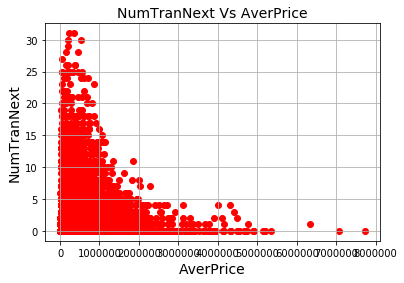

In [79]:
plt.scatter(df['AverPrice'], df['NumTranNext'], color='red')
plt.title('NumTranNext Vs AverPrice', fontsize=14)
plt.xlabel('AverPrice', fontsize=14)
plt.ylabel('NumTranNext', fontsize=14)
plt.grid(True)
plt.show()

In [80]:
from sklearn import linear_model
import statsmodels.api as sm

In [100]:
X = df[['AverArti','AverPrice','NumTran']] 
Y = df['NumTranNext']
#Shufle data, prepare to train
from scipy.sparse import coo_matrix
X_sparse = coo_matrix(X)
from sklearn.utils import shuffle
X, X_sparse, Y= shuffle(X, X_sparse, Y, random_state=0)
#Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -0.08484988607587018
Coefficients: 
 [-1.10552885e-03  3.60303420e-09  4.77706739e-01]


In [101]:
# prediction with sklearn
New_AverArti = 1
New_AverPrice = 300
New_NumTran = 1
print ('The number of Transaction in next month: \n', regr.predict([[New_AverArti ,New_AverPrice, New_NumTran]]))

The number of Transaction in next month: 
 [0.3917524]


In [134]:
[[New_AverArti ,New_AverPrice, New_NumTran]]

[[1, 300, 1]]

In [136]:
Pre=X_test.values[1]
i=Pre.reshape(1, -1)
regr.predict(i)

array([3.25436027])

In [167]:
Pre=X_test.values
Y_predict=[]
for i in Pre:
    Y_predict.append(regr.predict(i.reshape(1, -1)))

In [191]:
DataPre=[]
DataPre.append(Customer1)
DataPre.append(Y_predict)

In [192]:
DaPre=np.array(DataPre)

In [200]:
CSNpoten=DaPre[0]
TranPre=DaPre[1]

In [201]:
type(CSNpoten)

numpy.ndarray

In [202]:
list=[]
for i in TranPre:
    if i>=1:
        ind=TranPre.index(i)
        list.append(CSNpoten[ind])
        

In [203]:
list

['ZGZobGdp',
 'Y2NibmVq',
 'YmVlb2Nq',
 'ZGdpb2dn',
 'ZGNja2JnYw==',
 'ZGlpb2Zn',
 'Y2hnaWlkYQ==',
 'amdocWRq',
 'Y2RpaGdnaQ==',
 'ZGdhbmdn',
 'ZGdicWFo',
 'Y2xkaWZraQ==',
 'ZWlhamplYA==',
 'ZGpgcWVn',
 'YmZibmFlYQ==',
 'amxkbWhr',
 'ZGNjamRqaQ==',
 'ZWlmcGFsYQ==',
 'Y2pmbGRqZg==',
 'ZmZoa2dq',
 'ZGVobGJlYA==',
 'ZGdobmNkaA==',
 'ZWhoa2hmZA==',
 'ZWhla2NpZQ==',
 'ZGpicWJr',
 'Y2pjbGRsYQ==',
 'ZmZpcA==',
 'ZWNobGZjYw==',
 'ZGxpbGZo',
 'ZGdlbmhrYg==',
 'ZGdpaWZs',
 'ZWplcWRlZw==',
 'ZWhmb2FlZA==',
 'Y2xlbGNmaA==',
 'Y2xpbGVl',
 'YmRibmRmZg==',
 'ZGhpa2JlYw==',
 'ZWRhaWpnYw==',
 'ZWlmbGppZQ==',
 'YmVjbGdpaA==',
 'ZGpjbGpq',
 'ZGphaGhl',
 'YmRiamFkaQ==',
 'ZGdjaGJo',
 'ZWplbGRmYw==',
 'ZmlmcWpn',
 'ZGpnamdpYA==',
 'ZWZnbGI=',
 'ZWNkaGJlZg==',
 'Z2NpaWdk',
 'ZmNiaWNn',
 'amdiaGNj',
 'Y2RkcGdkZg==',
 'ZGxhcWhsaA==',
 'Y2VoaWNnYA==',
 'YmtlbGRnZQ==',
 'ZGdla2Np',
 'Y2loaGJj',
 'Y2pob2RnYQ==',
 'ZGtnaGljaQ==',
 'ZGZpb2pq',
 'ZGxmamJm',
 'YmVpa2dsYA==',
 'YmpmcGdoZw==',
 'YmthcGZm',
 'YmxhbmFrY

In [204]:
len(list)

1759